## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation= 'softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs= [out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
#將模型從 Adam改成 SGD
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

W1010 11:42:18.833252  4780 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1010 11:42:18.852033  4780 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W1010 11:42:29.523005  4780 deprecation.py:323] From C:\Users\HAO\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1010 11:42:29.711621  4780 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 379us/step - loss: 2.2642 - acc: 0.1552 - val_loss: 2.2240 - val_acc: 0.1860
Epoch 2/100
50000/50000 [==============================] - 11s 227us/step - loss: 2.1929 - acc: 0.2096 - val_loss: 2.1662 - val_acc: 0.2132
Epoch 3/100
50000/50000 [==============================] - 11s 221us/step - loss: 2.1380 - acc: 0.2368 - val_loss: 2.1159 - val_acc: 0.2382
Epoch 4/100
50000/50000 [==============================] - 11s 215us/step - loss: 2.0928 - acc: 0.2547 - val_loss: 2.0759 - val_acc: 0.2564
Epoch 5/100
50000/50000 [==============================] - 11s 217us/step - loss: 2.0555 - acc: 0.2720 - val_loss: 2.0418 - val_acc: 0.2735
Epoch 6/100
50000/50000 [==============================] - 11s 226us/step - loss: 2.0240 - acc: 0.2864 - val_loss: 2.0128 - val_acc: 0.2923
Epoch 7/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.9969 - acc: 0.2993 - val_l

50000/50000 [==============================] - 11s 212us/step - loss: 1.6597 - acc: 0.4233 - val_loss: 1.6683 - val_acc: 0.4193
Epoch 59/100
50000/50000 [==============================] - 10s 209us/step - loss: 1.6564 - acc: 0.4250 - val_loss: 1.6688 - val_acc: 0.4170
Epoch 60/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.6536 - acc: 0.4264 - val_loss: 1.6648 - val_acc: 0.4234
Epoch 61/100
50000/50000 [==============================] - 10s 207us/step - loss: 1.6503 - acc: 0.4269 - val_loss: 1.6615 - val_acc: 0.4225
Epoch 62/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.6474 - acc: 0.4271 - val_loss: 1.6586 - val_acc: 0.4229
Epoch 63/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.6446 - acc: 0.4286 - val_loss: 1.6544 - val_acc: 0.4242
Epoch 64/100
50000/50000 [==============================] - 10s 208us/step - loss: 1.6414 - acc: 0.4311 - val_loss: 1.6516 - val_acc: 0.4243
Epoch 65/100
50000/50000 [

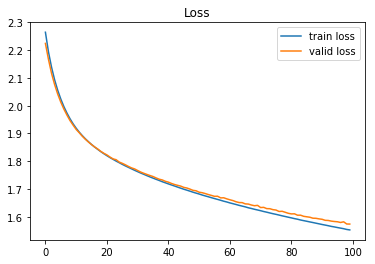

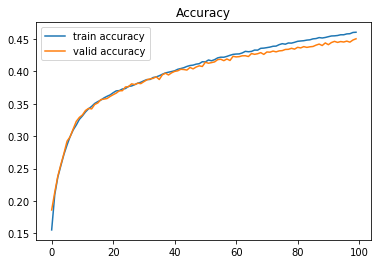

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
#complie 模型
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
#將epoch從100改成500
model.fit(x_train,y_train,
          epochs = 500,
          batch_size = 256,
          validation_data=(x_test,y_test),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 26s 518us/step - loss: 2.0124 - acc: 0.3036 - val_loss: 1.7746 - val_acc: 0.3684
Epoch 2/500
50000/50000 [==============================] - 17s 344us/step - loss: 1.7191 - acc: 0.3847 - val_loss: 1.6672 - val_acc: 0.4049
Epoch 3/500
50000/50000 [==============================] - 16s 314us/step - loss: 1.6250 - acc: 0.4179 - val_loss: 1.6786 - val_acc: 0.3970
Epoch 4/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.5586 - acc: 0.4438 - val_loss: 1.5806 - val_acc: 0.4406
Epoch 5/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.5100 - acc: 0.4614 - val_loss: 1.5139 - val_acc: 0.4645
Epoch 6/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.4697 - acc: 0.4761 - val_loss: 1.4814 - val_acc: 0.4706
Epoch 7/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4472 - acc: 0.4847 - val_l

Epoch 59/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.5299 - acc: 0.8098 - val_loss: 1.9868 - val_acc: 0.5167
Epoch 60/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.5342 - acc: 0.8099 - val_loss: 2.0216 - val_acc: 0.5197
Epoch 61/500
50000/50000 [==============================] - 19s 386us/step - loss: 0.5206 - acc: 0.8145 - val_loss: 2.0351 - val_acc: 0.5169
Epoch 62/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.4995 - acc: 0.8196 - val_loss: 2.1722 - val_acc: 0.5009
Epoch 63/500
50000/50000 [==============================] - 16s 320us/step - loss: 0.5138 - acc: 0.8169 - val_loss: 2.1013 - val_acc: 0.5235
Epoch 64/500
50000/50000 [==============================] - 18s 357us/step - loss: 0.4944 - acc: 0.8230 - val_loss: 2.0781 - val_acc: 0.5191
Epoch 65/500
50000/50000 [==============================] - 16s 313us/step - loss: 0.4834 - acc: 0.8277 - val_loss: 2.1246 - val_acc: 0.5163
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.2201 - acc: 0.9200 - val_loss: 3.4713 - val_acc: 0.5010
Epoch 118/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.2077 - acc: 0.9256 - val_loss: 3.5043 - val_acc: 0.4962
Epoch 119/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.2533 - acc: 0.9100 - val_loss: 3.4944 - val_acc: 0.4975
Epoch 120/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.2277 - acc: 0.9170 - val_loss: 3.5040 - val_acc: 0.4944
Epoch 121/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.2423 - acc: 0.9136 - val_loss: 3.5245 - val_acc: 0.4934
Epoch 122/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.2600 - acc: 0.9072 - val_loss: 3.5717 - val_acc: 0.4971
Epoch 123/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.2259 - acc: 0.9183 - val_loss: 3.4830 - val_acc: 0.5028
Epoch 

Epoch 175/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.1573 - acc: 0.9432 - val_loss: 4.3137 - val_acc: 0.4909
Epoch 176/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.1476 - acc: 0.9478 - val_loss: 4.1971 - val_acc: 0.4921
Epoch 177/500
50000/50000 [==============================] - 15s 304us/step - loss: 0.1557 - acc: 0.9442 - val_loss: 4.3610 - val_acc: 0.4948
Epoch 178/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.1266 - acc: 0.9561 - val_loss: 4.3309 - val_acc: 0.4946
Epoch 179/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.1624 - acc: 0.9422 - val_loss: 4.3602 - val_acc: 0.4897
Epoch 180/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.1653 - acc: 0.9414 - val_loss: 4.2697 - val_acc: 0.4926
Epoch 181/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.1646 - acc: 0.9410 - val_loss: 4.2994 - val_acc: 0.4886
Epoch 

50000/50000 [==============================] - 16s 316us/step - loss: 0.0727 - acc: 0.9742 - val_loss: 4.5725 - val_acc: 0.5018
Epoch 233/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.0596 - acc: 0.9798 - val_loss: 4.6654 - val_acc: 0.4931
Epoch 234/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.1093 - acc: 0.9621 - val_loss: 4.6708 - val_acc: 0.4929
Epoch 235/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.1967 - acc: 0.9337 - val_loss: 4.6361 - val_acc: 0.4832
Epoch 236/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.1525 - acc: 0.9484 - val_loss: 4.6502 - val_acc: 0.4878
Epoch 237/500
50000/50000 [==============================] - 20s 405us/step - loss: 0.1483 - acc: 0.9498 - val_loss: 4.6543 - val_acc: 0.4925
Epoch 238/500
50000/50000 [==============================] - 18s 360us/step - loss: 0.1434 - acc: 0.9512 - val_loss: 4.7357 - val_acc: 0.4953
Epoch 239/500
50000/

50000/50000 [==============================] - 18s 350us/step - loss: 0.0695 - acc: 0.9766 - val_loss: 5.0054 - val_acc: 0.4855
Epoch 290/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0480 - acc: 0.9842 - val_loss: 4.9295 - val_acc: 0.4928
Epoch 291/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1399 - acc: 0.9533 - val_loss: 5.1114 - val_acc: 0.4815
Epoch 292/500
50000/50000 [==============================] - 19s 379us/step - loss: 0.1753 - acc: 0.9430 - val_loss: 5.0822 - val_acc: 0.4889
Epoch 293/500
50000/50000 [==============================] - 18s 367us/step - loss: 0.1450 - acc: 0.9534 - val_loss: 4.8917 - val_acc: 0.4982
Epoch 294/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.0780 - acc: 0.9725 - val_loss: 4.9553 - val_acc: 0.4956
Epoch 295/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.0571 - acc: 0.9797 - val_loss: 4.8767 - val_acc: 0.4893
Epoch 296/500
50000/

Epoch 347/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0561 - acc: 0.9810 - val_loss: 5.0571 - val_acc: 0.4951
Epoch 348/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.0674 - acc: 0.9762 - val_loss: 5.1032 - val_acc: 0.4956
Epoch 349/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.0869 - acc: 0.9711 - val_loss: 5.1638 - val_acc: 0.4870
Epoch 350/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.1827 - acc: 0.9443 - val_loss: 5.0558 - val_acc: 0.4835
Epoch 351/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.1760 - acc: 0.9443 - val_loss: 5.0784 - val_acc: 0.4893
Epoch 352/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0863 - acc: 0.9710 - val_loss: 5.1422 - val_acc: 0.4911
Epoch 353/500
50000/50000 [==============================] - 15s 293us/step - loss: 0.0542 - acc: 0.9818 - val_loss: 5.0892 - val_acc: 0.4916
Epoch 

Epoch 405/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0379 - acc: 0.9876 - val_loss: 5.1640 - val_acc: 0.4934
Epoch 406/500
50000/50000 [==============================] - 14s 290us/step - loss: 0.0149 - acc: 0.9962 - val_loss: 5.2079 - val_acc: 0.4941
Epoch 407/500
50000/50000 [==============================] - 15s 290us/step - loss: 0.0093 - acc: 0.9980 - val_loss: 5.1500 - val_acc: 0.5017
Epoch 408/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0055 - acc: 0.9993 - val_loss: 5.1732 - val_acc: 0.4981
Epoch 409/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 5.2109 - val_acc: 0.4966
Epoch 410/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0037 - acc: 0.9995 - val_loss: 5.2233 - val_acc: 0.4972
Epoch 411/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0041 - acc: 0.9995 - val_loss: 5.2358 - val_acc: 0.5008
Epoch 

Epoch 463/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.0768 - acc: 0.9746 - val_loss: 4.5109 - val_acc: 0.4994
Epoch 464/500
50000/50000 [==============================] - 23s 452us/step - loss: 0.0246 - acc: 0.9943 - val_loss: 4.5977 - val_acc: 0.4989
Epoch 465/500
50000/50000 [==============================] - 19s 378us/step - loss: 0.0162 - acc: 0.9968 - val_loss: 4.6370 - val_acc: 0.4999
Epoch 466/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.0074 - acc: 0.9996 - val_loss: 4.6587 - val_acc: 0.5039
Epoch 467/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 4.7079 - val_acc: 0.5056
Epoch 468/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 4.7393 - val_acc: 0.5033
Epoch 469/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.7798 - val_acc: 0.5052
Epoch 

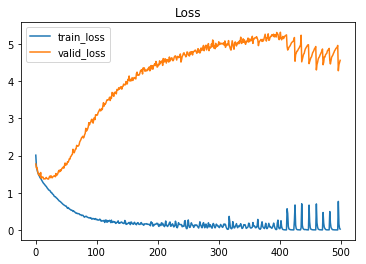

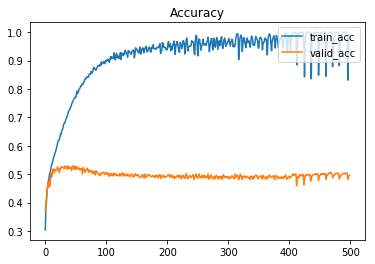

In [13]:
import matplotlib.pyplot as plt
train_loss = model.history.history['loss']
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label = "train_loss")
plt.plot(range(len(valid_loss)), valid_loss, label = "valid_loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label = "train_acc")
plt.plot(range(len(valid_acc)), valid_acc, label = "valid_acc")
plt.legend(loc="upper right")
plt.title("Accuracy")
plt.show()

